In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Forecast the one year sales (Breakdown monthly) for each of the items.

In [4]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT i.item_name,tim.year, tim.month ,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " GROUP BY tim.year, tim.month ,i.item_name "\
              "ORDER BY i.item_name,tim.year,tim.month"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('100% Juice Box Variety 6.75 oz ', 2014, 1, Decimal('1980.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 2, Decimal('3360.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 3, Decimal('4470.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 4, Decimal('3060.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 5, Decimal('4500.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 6, Decimal('4515.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 7, Decimal('4515.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 8, Decimal('3780.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 9, Decimal('4530.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 10, Decimal('5340.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 11, Decimal('5055.0')),
 ('100% Juice Box Variety 6.75 oz ', 2014, 12, Decimal('4260.0')),
 ('100% Juice Box Variety 6.75 oz ', 2015, 1, Decimal('4290.0')),
 ('100% Juice Box Variety 6.75 oz ', 2015, 2, Decimal('3495.0')),
 ('100% Juice Box Variety 6.75 oz ', 2015, 3, Decimal('3180.0')),
 ('100%

In [5]:
df = pd.DataFrame(list(records), columns=['Item_name', 'Year' ,'Month','Total_Sales'])
df

,Item_name,Year,Month,Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1,1980.0
1,100% Juice Box Variety 6.75 oz,2014,2,3360.0
2,100% Juice Box Variety 6.75 oz,2014,3,4470.0
3,100% Juice Box Variety 6.75 oz,2014,4,3060.0
4,100% Juice Box Variety 6.75 oz,2014,5,4500.0
...,...,...,...,...
22010,Zoo Animal Cookies/Crackers,2020,9,3374.0
22011,Zoo Animal Cookies/Crackers,2020,10,4578.0
22012,Zoo Animal Cookies/Crackers,2020,11,3528.0
22013,Zoo Animal Cookies/Crackers,2020,12,4256.0


In [6]:
id_vars= ['Item_name','Year']
df_sum = df.groupby(id_vars)['Total_Sales'].sum()
df_sum

Item_name                        Year
100% Juice Box Variety 6.75 oz   2014    49365.0
                                 2015    47160.0
                                 2016    51135.0
                                 2017    47295.0
                                 2018    51045.0
                                          ...   
Zoo Animal Cookies/Crackers      2017    43456.0
                                 2018    43638.0
                                 2019    44912.0
                                 2020    43498.0
                                 2021     2898.0
Name: Total_Sales, Length: 2072, dtype: object

In [7]:
df2=df.merge(df_sum.rename('Yearly_Total_Sales'),on=id_vars)
df2

,Item_name,Year,Month,Total_Sales,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1,1980.0,49365.0
1,100% Juice Box Variety 6.75 oz,2014,2,3360.0,49365.0
2,100% Juice Box Variety 6.75 oz,2014,3,4470.0,49365.0
3,100% Juice Box Variety 6.75 oz,2014,4,3060.0,49365.0
4,100% Juice Box Variety 6.75 oz,2014,5,4500.0,49365.0
...,...,...,...,...,...
22010,Zoo Animal Cookies/Crackers,2020,9,3374.0,43498.0
22011,Zoo Animal Cookies/Crackers,2020,10,4578.0,43498.0
22012,Zoo Animal Cookies/Crackers,2020,11,3528.0,43498.0
22013,Zoo Animal Cookies/Crackers,2020,12,4256.0,43498.0


In [8]:
df2.head(20)

,Item_name,Year,Month,Total_Sales,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1,1980.0,49365.0
1,100% Juice Box Variety 6.75 oz,2014,2,3360.0,49365.0
2,100% Juice Box Variety 6.75 oz,2014,3,4470.0,49365.0
3,100% Juice Box Variety 6.75 oz,2014,4,3060.0,49365.0
4,100% Juice Box Variety 6.75 oz,2014,5,4500.0,49365.0
5,100% Juice Box Variety 6.75 oz,2014,6,4515.0,49365.0
6,100% Juice Box Variety 6.75 oz,2014,7,4515.0,49365.0
7,100% Juice Box Variety 6.75 oz,2014,8,3780.0,49365.0
8,100% Juice Box Variety 6.75 oz,2014,9,4530.0,49365.0
9,100% Juice Box Variety 6.75 oz,2014,10,5340.0,49365.0


In [9]:
df2[['Item_name','Yearly_Total_Sales']] = df2[['Item_name','Yearly_Total_Sales']].mask(df2['Yearly_Total_Sales'].duplicated()).fillna('')
df2.head(20)

,Item_name,Year,Month,Total_Sales,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1,1980.0,49365.0
1,,2014,2,3360.0,
2,,2014,3,4470.0,
3,,2014,4,3060.0,
4,,2014,5,4500.0,
5,,2014,6,4515.0,
6,,2014,7,4515.0,
7,,2014,8,3780.0,
8,,2014,9,4530.0,
9,,2014,10,5340.0,


In [10]:
df2.columns[df2.isna().any()]

Index([], dtype='object')

In [11]:
df2.dtypes

Item_name             object
Year                   int64
Month                  int64
Total_Sales           object
Yearly_Total_Sales    object
dtype: object

In [12]:
df2['Yearly_Total_Sales'] = pd.to_numeric(df2['Yearly_Total_Sales'],errors='coerce')

In [13]:
df2.dtypes

Item_name              object
Year                    int64
Month                   int64
Total_Sales            object
Yearly_Total_Sales    float64
dtype: object

In [14]:
df3=df2.iloc[0:100]
df3

,Item_name,Year,Month,Total_Sales,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1,1980.0,49365.0
1,,2014,2,3360.0,NaN
2,,2014,3,4470.0,NaN
3,,2014,4,3060.0,NaN
4,,2014,5,4500.0,NaN
...,...,...,...,...,...
95,,2014,11,3369.5,NaN
96,,2014,12,3070.5,NaN
97,A&W Root Beer - 12 oz cans,2015,1,3473.0,40238.5
98,,2015,2,3795.0,NaN


In [15]:
df4= df3.dropna()
df4

,Item_name,Year,Month,Total_Sales,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1,1980.0,49365.0
12,100% Juice Box Variety 6.75 oz,2015,1,4290.0,47160.0
24,100% Juice Box Variety 6.75 oz,2016,1,4050.0,51135.0
36,100% Juice Box Variety 6.75 oz,2017,1,3555.0,47295.0
48,100% Juice Box Variety 6.75 oz,2018,1,4545.0,51045.0
60,100% Juice Box Variety 6.75 oz,2019,1,5115.0,51840.0
72,100% Juice Box Variety 6.75 oz,2020,1,4020.0,51660.0
84,100% Juice Box Variety 6.75 oz,2021,1,1875.0,1875.0
85,A&W Root Beer - 12 oz cans,2014,1,1518.0,37202.5
97,A&W Root Beer - 12 oz cans,2015,1,3473.0,40238.5


In [16]:
data = df4.drop(columns=df4.columns[2])
data

,Item_name,Year,Total_Sales,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,1980.0,49365.0
12,100% Juice Box Variety 6.75 oz,2015,4290.0,47160.0
24,100% Juice Box Variety 6.75 oz,2016,4050.0,51135.0
36,100% Juice Box Variety 6.75 oz,2017,3555.0,47295.0
48,100% Juice Box Variety 6.75 oz,2018,4545.0,51045.0
60,100% Juice Box Variety 6.75 oz,2019,5115.0,51840.0
72,100% Juice Box Variety 6.75 oz,2020,4020.0,51660.0
84,100% Juice Box Variety 6.75 oz,2021,1875.0,1875.0
85,A&W Root Beer - 12 oz cans,2014,1518.0,37202.5
97,A&W Root Beer - 12 oz cans,2015,3473.0,40238.5


In [25]:
data1 = data.drop(columns=data.columns[2])
data1

,Item_name,Year,Yearly_Total_Sales
0,100% Juice Box Variety 6.75 oz,2014,49365.0
12,100% Juice Box Variety 6.75 oz,2015,47160.0
24,100% Juice Box Variety 6.75 oz,2016,51135.0
36,100% Juice Box Variety 6.75 oz,2017,47295.0
48,100% Juice Box Variety 6.75 oz,2018,51045.0
60,100% Juice Box Variety 6.75 oz,2019,51840.0
72,100% Juice Box Variety 6.75 oz,2020,51660.0
84,100% Juice Box Variety 6.75 oz,2021,1875.0
85,A&W Root Beer - 12 oz cans,2014,37202.5
97,A&W Root Beer - 12 oz cans,2015,40238.5


In [26]:
data1.dtypes

Item_name              object
Year                    int64
Yearly_Total_Sales    float64
dtype: object

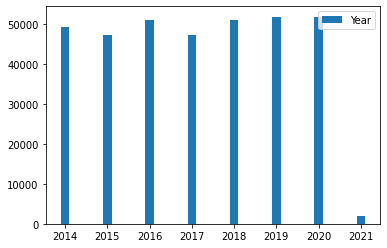

In [28]:
plt.bar(data1['Year'],data1['Yearly_Total_Sales'],width=0.2,label="Year")
plt.legend()

<AxesSubplot:xlabel='Item_name'>

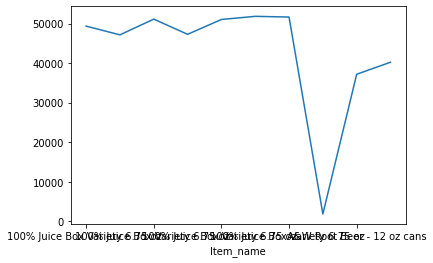

In [29]:
data1.set_index('Item_name')['Yearly_Total_Sales'].plot()

<AxesSubplot:xlabel='Item_name', ylabel='Yearly_Total_Sales'>

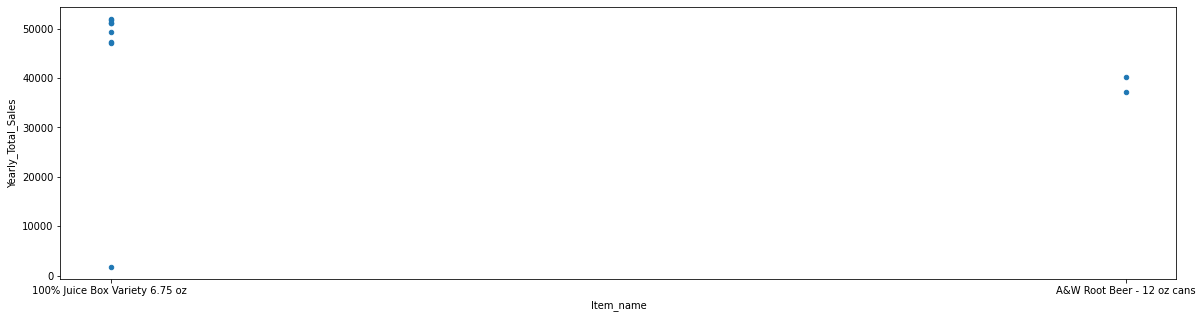

In [30]:
data1.plot.scatter('Item_name','Yearly_Total_Sales',figsize=(20,5))

<AxesSubplot:xlabel='Year', ylabel='Yearly_Total_Sales'>

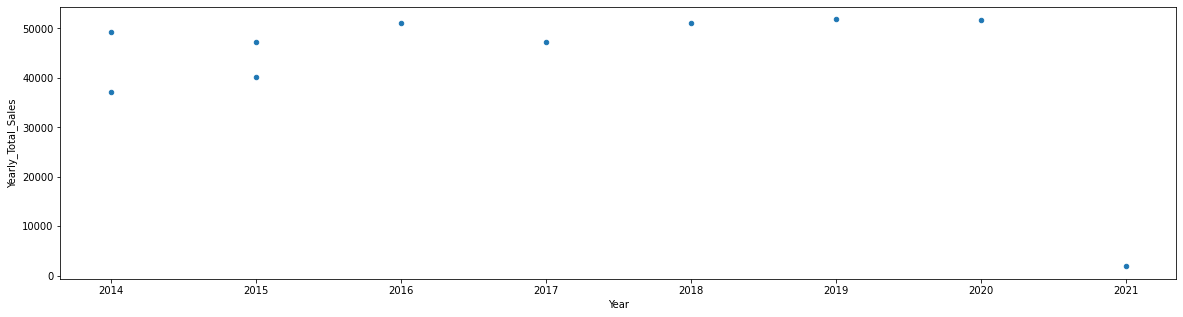

In [31]:
data1.plot.scatter('Year','Yearly_Total_Sales',figsize=(20,5))

In [33]:
data1.Item_name[data1.Item_name == '100% Juice Box Variety 6.75 oz'] = 1
data1.Item_name[data1.Item_name == 'A&W Root Beer'] = 0
print(data1)

                          Item_name  Year  Yearly_Total_Sales
0   100% Juice Box Variety 6.75 oz   2014             49365.0
12  100% Juice Box Variety 6.75 oz   2015             47160.0
24  100% Juice Box Variety 6.75 oz   2016             51135.0
36  100% Juice Box Variety 6.75 oz   2017             47295.0
48  100% Juice Box Variety 6.75 oz   2018             51045.0
60  100% Juice Box Variety 6.75 oz   2019             51840.0
72  100% Juice Box Variety 6.75 oz   2020             51660.0
84  100% Juice Box Variety 6.75 oz   2021              1875.0
85       A&W Root Beer - 12 oz cans  2014             37202.5
97       A&W Root Beer - 12 oz cans  2015             40238.5


C:\Users\Hello iT\AppData\Local\Temp\ipykernel_16136\1321005434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.Item_name[data1.Item_name == '100% Juice Box Variety 6.75 oz'] = 1
C:\Users\Hello iT\AppData\Local\Temp\ipykernel_16136\1321005434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.Item_name[data1.Item_name == 'A&W Root Beer'] = 0


In [32]:
binary=set(data1['Item_name'])
data1['Item_name']=data1['Item_name'].map({'100% Juice Box Variety 6.75 oz':0 ,'A&W Root Beer':1}).astype(int)
print(data1.head)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [41]:
df6 = data1.copy()
df6 = pd.get_dummies(data1, columns=['Item_name'],prefix=None)

print(df6.head())

    Year  Yearly_Total_Sales  Item_name_100% Juice Box Variety 6.75 oz   \
0   2014             49365.0                                          1   
12  2015             47160.0                                          1   
24  2016             51135.0                                          1   
36  2017             47295.0                                          1   
48  2018             51045.0                                          1   

    Item_name_A&W Root Beer - 12 oz cans  
0                                      0  
12                                     0  
24                                     0  
36                                     0  
48                                     0  


### Segregate Dataset into X(Input/IndependentVariable) & Y(output/dependentVariable)

In [45]:
X = df6.drop('Yearly_Total_Sales', axis='columns')
X

,Year,Item_name_100% Juice Box Variety 6.75 oz,Item_name_A&W Root Beer - 12 oz cans
0,2014,1,0
12,2015,1,0
24,2016,1,0
36,2017,1,0
48,2018,1,0
60,2019,1,0
72,2020,1,0
84,2021,1,0
85,2014,0,1
97,2015,0,1


In [46]:
Y = df6.Yearly_Total_Sales
Y


0     49365.0
12    47160.0
24    51135.0
36    47295.0
48    51045.0
60    51840.0
72    51660.0
84     1875.0
85    37202.5
97    40238.5
Name: Yearly_Total_Sales, dtype: float64

###  Spliting Dataset into Train & Test

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y ,test_size= 0.25 ,random_state= 0)

### Training The Dataset

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train,Y_train)

ValueError: Unknown label type: 'continuous'